In [ ]:
#Importamos todas las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import plotly
import plotly.express as px
from matplotlib import style
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)


In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Funcion para calcular la distancia entre dos puntos a través de la función haversine,
# esto nos permite convertir coordenadas en unidades de distancia
from math import radians, cos, sin, asin, sqrt
def DistanciaGPS (lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convertimos grados decimales en radianes
           
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Se utiliza la formula Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
df=pd.ExcelFile('Dataset1.xlsx')
df1 = pd.read_excel(df, na_values='?')
df1.head()

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,Fec. Prod,Doc. Transporte,Estado,Placa,Cliente,Descripción de Obra,Pto. Exped,V. Entregado,H. Program,Tiempo de Proceso 1,Tiempo de Proceso 2,Tiempo Proceso Minutos,Traslado a Obra 1,Traslado a Obra 2,Tiempo Translado Minutos,Espera en Obra 1,Espera en Obra 2,Tiempo Espera Minutos,Descarga en Obra 1,Descarga en Obra 2,Tiempo Descarga Minutos,Retorno as Planta 1,Retorno as Planta 2,Tiempo Retorno Planta Minutos,Dif. Total,WERK LAT,WERK LON,Código de Obra,OBRA LON,OBRA LAT,DESCRIPCION,Fecha_DiaSem,FinSemana,FinMes,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,T.Ciclo Calc (T5-PROD),Asentamiento,Asentamiento_Agr,Tipo Obra
0,1732932,1213,05.08.2019,50006802,9000038274,004-01588,C210-I-H57-A4,16,1,200399000,2001325815,2019-08-06 08:44:00,1732932,-1/Llegada a Planta,T3H-928,S/C,816098,DINO TRUJILLO NORTE,8.0,2019-08-03 07:00:00,NaT,2019-08-06 07:54:00,-,2019-08-06 07:54:00,2019-08-06 11:40:00,03:46:00,2019-08-06 11:40:00,2019-08-06 11:56:00,00:16:00,2019-08-06 11:56:00,2019-08-06 12:49:00,00:53:00,2019-08-06 12:49:00,2019-08-06 12:51:00,00:02:00,06:06:00,-8.053661,-79.061618,9000038274,-79.063383,-8.059475,PISOS,2,0,0,NaN,226.0,16.0,53,2.0,247,A3,A3,Pequeña
1,1742807,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,200401326,2001332963,2019-08-21 08:28:00,1742807,-1/Llegada a Planta,T8W-933,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 09:47:00,-,2019-08-21 09:47:00,2019-08-21 10:12:00,00:25:00,2019-08-21 10:12:00,2019-08-21 10:42:00,00:30:00,2019-08-21 10:42:00,2019-08-21 11:03:00,00:21:00,2019-08-21 11:03:00,2019-08-21 11:29:00,00:26:00,05:00:00,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,25.0,30.0,21,26.0,181,A3,A3,Pequeña
2,1742809,1213,21.08.2019,13171955,9000030626,004-02808,M1:5-I-A5,18,17,200401413,2001332965,2019-08-21 08:34:00,1742809,-1/Llegada a Planta,ASN-882,S/C,809638,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 10:03:00,-,2019-08-21 10:03:00,2019-08-21 10:41:00,00:38:00,2019-08-21 10:41:00,2019-08-21 10:44:00,00:03:00,2019-08-21 10:44:00,2019-08-21 12:21:00,01:37:00,2019-08-21 12:21:00,2019-08-21 13:09:00,00:48:00,04:19:00,-8.053661,-79.061618,9000030626,-79.034438,-8.140475,CONTRAPISO,3,0,0,NaN,38.0,3.0,97,48.0,275,A3,A3,Pequeña
3,1742817,1203,21.08.2019,50010990,9000034745,004-01773,C280-MS-H57-A5,16,2,200401350,2001332977,2019-08-21 08:43:00,1742817,-1/Llegada a Planta,B2R-918,S/C,814583,DINO PIURA,NaN,NaT,NaT,2019-08-21 10:02:00,-,2019-08-21 10:02:00,2019-08-21 10:10:00,00:08:00,2019-08-21 10:10:00,2019-08-21 10:32:00,00:22:00,2019-08-21 10:32:00,2019-08-21 11:00:00,00:28:00,2019-08-21 11:00:00,2019-08-21 11:12:00,00:12:00,04:28:00,-5.164840,-80.718861,9000034745,-80.689045,-5.160834,PISOS,3,0,0,NaN,8.0,22.0,28,12.0,149,A3,A3,Pequeña
4,1742824,1213,21.08.2019,11588638,9000033374,004-01626,C280-MS-H67-A5,16,1,200401326,2001332984,2019-08-21 08:49:00,1742824,-1/Llegada a Planta,ATN-707,S/C,816615,DINO TRUJILLO NORTE,NaN,NaT,NaT,2019-08-21 07:35:00,-,2019-08-21 07:35:00,2019-08-21 08:03:00,00:28:00,2019-08-21 08:03:00,2019-08-21 08:20:00,00:17:00,2019-08-21 08:20:00,2019-08-21 08:38:00,00:18:00,2019-08-21 08:38:00,2019-08-21 09:01:00,00:23:00,02:04:00,-8.053661,-79.061618,9000033374,-79.099240,-8.102218,PISOS,3,0,0,NaN,28.0,17.0,18,23.0,12,A3,A3,Pequeña


In [ ]:
# Podemos observar la cantidad de valores nulos que se encuentran en la data
df1.isnull().sum()

TKNUM                                0
WERKS                                0
FECHA_DESP                           0
KUNNR                                0
IDEOBRA                              0
MATNR                                0
FORMULA                              0
ID_ESTRUC                            0
ID_MODALIDAD                         0
VBELN_PED                            0
VBELN_ENTREGA                        0
Fec. Prod                            0
Doc. Transporte                      0
Estado                               0
Placa                                0
Cliente                              0
Descripción de Obra                  0
Pto. Exped                           0
V. Entregado                        20
H. Program                          20
Tiempo de Proceso 1               8518
Tiempo de Proceso 2                  0
Tiempo Proceso Minutos             138
Traslado a Obra 1                    0
Traslado a Obra 2                    0
Tiempo Translado Minutos 

In [ ]:
#Funcion Dummy
# Definimos la función que nos ayudara a crear los dummies para alimentar el modelo


def dummy_convert (df,ID_ESTRUC):

    estruturas = pd.get_dummies(df[ID_ESTRUC], prefix = ID_ESTRUC)
    df = pd.concat([df, estruturas], axis = 1, )

    return df

In [ ]:
# Es necesario estandarizar el formato de las columnas y eliminar los espacios para trabajar de manera mas fluida
df1.columns

Index(['TKNUM  ', 'WERKS', 'FECHA_DESP', 'KUNNR     ', 'IDEOBRA   ', 'MATNR    ', 'FORMULA                       ', 'ID_ESTRUC', 'ID_MODALIDAD',
       'VBELN_PED', 'VBELN_ENTREGA', 'Fec. Prod', 'Doc. Transporte', 'Estado', 'Placa', 'Cliente', 'Descripción de Obra', 'Pto. Exped',
       'V. Entregado', 'H. Program', 'Tiempo de Proceso 1', 'Tiempo de Proceso 2', 'Tiempo Proceso Minutos', 'Traslado a Obra 1',
       'Traslado a Obra 2', 'Tiempo Translado Minutos', 'Espera en Obra 1', 'Espera en Obra 2', 'Tiempo Espera Minutos', 'Descarga en Obra 1',
       'Descarga en Obra 2', 'Tiempo Descarga Minutos', 'Retorno as Planta 1', 'Retorno as Planta 2', 'Tiempo Retorno Planta Minutos', 'Dif. Total',
       'WERK LAT', 'WERK LON', '  Código de Obra', 'OBRA LON', 'OBRA LAT', 'DESCRIPCION', 'Fecha_DiaSem', 'FinSemana', 'FinMes', 'T.Proceso',
       'T.Traslado', 'T.Espera', 'T.Descarga', 'T.Retorno', 'T.Ciclo Calc (T5-PROD)', 'Asentamiento', 'Asentamiento_Agr', 'Tipo Obra'],
      dtype='object

In [ ]:
# procedemos a crear un diccionario con los nuevos valores de columnas
df1.rename(columns={'TKNUM  ' : 'TKNUM',
                    'WERKS' : 'WERKS',
                    'FECHA_DESP' : 'FECHA_DESP',
                    'KUNNR     ' : 'KUNNR',
                    'IDEOBRA   ' : 'IDEOBRA',
                    'MATNR    ' : 'MATNR',
                    'FORMULA                       ' : 'FORMULA',
                    'ID_ESTRUC' : 'ID_ESTRUC',
                    'ID_MODALIDAD' : 'ID_MODALIDAD',
                    'VBELN_PED' : 'VBELN_PED',
                    'VBELN_ENTREGA' : 'VBELN_ENTREGA',
                    'Fec. Prod': 'FEC_PROD',
                    'Doc. Transporte' : 'DOC_TRANS',
                    '  Código de Obra' : 'OBRA_COD',
                    'DES_ESTRUCTURA' : 'DES_ESTRUCTURA',
                    'Estado': 'ESTADO',
                    'Placa': 'PLACA',
                    'Cliente': 'CLIENTE',
                    'Descripción de Obra': 'DESC_OBRA',
                    'Pto. Exped': 'PTO_EXPED',
                    'V. Entregado' : 'V_ENTREGADO',
                    'H. Program' : 'H_PROGRAM',
                    'Tiempo de Proceso 1' : 'TPROCESO1',
                    'Tiempo de Proceso 2' : 'TPROCESO2',
                    'Tiempo Proceso' : 'TPROCESO',
                    'Traslado a Obra 1' : 'TRASLADO1',
                    'Traslado a Obra 2' : 'TRASLADO 2',
                    'Tiempo Translado Minutos' : 'TRASLADO',                     
                    'Espera en Obra 1': 'ESPERA1',
                    'Espera en Obra 2': 'ESPERA2',
                    'Tiempo Espera Minutos': 'TESPERA',
                    'Descarga en Obra 1' : 'DESCARGA1',
                    'Descarga en Obra 2' : 'DESCARGA2',
                    'Tiempo Descarga Minutos': 'TDESCARGA',
                    'Retorno as Planta 1': 'RETORNO1',
                    'Retorno as Planta 2': 'RETORNO2',
                    'Tiempo Retorno Planta Minutos': 'TRETORNO',
                    'Dif. Total': 'DIFTOTAL',
                    'T.Proceso' : 'TPROCESOTOTAL',
                    'T.Traslado' : 'TTRASLADOTOTAL',
                    'T.Espera' : 'TESPERATOTAL',
                    'T.Descarga': 'TDESCARGATOTAL',
                    'T.Retorno' : 'TRETORNOTOTAL',
                    'Dia' : 'DIA',
                    'Fecha_DiaSem' : 'DIASEMANA',
                    'FinSemana' : 'FINSEMANA', 
                    'T.Ciclo Calc (T5-PROD)': 'T5PROD', 
                    'Asentamiento' : 'ASENT', 
                    'Asentamiento_Agr' : 'ASENTAGR',  
                    'Tipo Obra': 'OBRATIPO',
                    'Eliminar' : 'ELIMINAR',
                    'FinMes': 'FINMES',
                    'WERK LON' : 'WERK_LON',
                    'WERK LAT' : 'WERK_LAT' ,
                    'OBRA LAT': 'OBRA_LAT',
                    'OBRA LON' : 'OBRA_LON'},
            inplace=True)



In [ ]:
# Creamos la columna distancia basandonos en la funcion definida para su calculo y se llenan las filas con los valores obtenidos
df1["DISTANCIA"]=df1.apply(lambda x: DistanciaGPS(x['WERK_LON'],x["WERK_LAT"],x["OBRA_LON"],x["OBRA_LAT"]),axis = 1)

In [ ]:
# Comprobamos que se ha realizado el cambio
df1["DISTANCIA"]

0         0.675132
1         6.804970
2        10.106453
3         3.331760
4         6.804970
           ...    
45678     8.547579
45679     4.457598
45680    27.784367
45681     1.979191
45682     8.547579
Name: DISTANCIA, Length: 45683, dtype: float64

In [ ]:
# Redondeamos para tener valores enteros
df1["DISTANCIA"] = df1["DISTANCIA"].apply(np.round)

In [ ]:
df1["DISTANCIA"]

0         1.0
1         7.0
2        10.0
3         3.0
4         7.0
         ... 
45678     9.0
45679     4.0
45680    28.0
45681     2.0
45682     9.0
Name: DISTANCIA, Length: 45683, dtype: float64

In [ ]:
print(df1.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'DISTANCIA']


In [ ]:
df2 =df1.copy()

In [ ]:
# Creamos variables dummy para cada una de las variables descriptivas que inferimos podrian incidir en el tiempo de descarga
df2=dummy_convert(df2,"ID_ESTRUC")
#aplica la funcion para ID_Estruc


In [ ]:
df2=dummy_convert(df2,"WERKS")
#aplica la fucntion para Werks

In [ ]:
df2=dummy_convert(df2, "ID_MODALIDAD")
#aplica la funcion para Modalidad

In [ ]:
df2=dummy_convert(df2, "ASENT")
#aplica la funcion para Asentamiento

In [ ]:
df2=dummy_convert(df2, "ASENTAGR")
#aplica la funcion para Asentamiento agregado

In [ ]:
df2=dummy_convert(df2, 'OBRATIPO')
#aplica la funcion para clasificación de tipo de obra

In [ ]:
# Obtenemos un analisis de la estadística de la data con los dummies creados
df2.describe()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,DOC_TRANS,V_ENTREGADO,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T5PROD,DISTANCIA,ID_ESTRUC_1,ID_ESTRUC_2,ID_ESTRUC_3,ID_ESTRUC_4,ID_ESTRUC_5,ID_ESTRUC_6,ID_ESTRUC_7,ID_ESTRUC_8,ID_ESTRUC_9,ID_ESTRUC_10,ID_ESTRUC_11,ID_ESTRUC_12,ID_ESTRUC_13,ID_ESTRUC_14,ID_ESTRUC_15,ID_ESTRUC_16,ID_ESTRUC_17,ID_ESTRUC_18,ID_ESTRUC_19,ID_ESTRUC_20,ID_ESTRUC_21,ID_ESTRUC_22,ID_ESTRUC_23,ID_ESTRUC_24,ID_ESTRUC_25,ID_ESTRUC_26,ID_ESTRUC_27,ID_ESTRUC_28,ID_ESTRUC_29,ID_ESTRUC_30,ID_ESTRUC_31,ID_ESTRUC_32,ID_ESTRUC_33,ID_ESTRUC_34,ID_ESTRUC_35,ID_ESTRUC_36,ID_ESTRUC_37,ID_ESTRUC_38,ID_ESTRUC_39,ID_ESTRUC_40,ID_ESTRUC_41,ID_ESTRUC_42,ID_ESTRUC_43,ID_ESTRUC_44,ID_ESTRUC_45,ID_ESTRUC_46,ID_ESTRUC_47,ID_ESTRUC_48,ID_ESTRUC_49,ID_ESTRUC_50,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_1253,WERKS_5202,WERKS_5212,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_4,ID_MODALIDAD_6,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21,ID_MODALIDAD_22,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña
count,4.568300e+04,45683.000000,4.568300e+04,4.568300e+04,45683.000000,45683.000000,4.568300e+04,4.568300e+04,4.568300e+04,45663.000000,45683.000000,45683.000000,4.568300e+04,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,36381.000000,45583.000000,44096.000000,45683.000000,45629.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000,45683.000000
mean,1.881342e+06,1294.981525,4.081508e+08,9.000040e+09,15.020839,2.593963,2.004308e+08,2.001418e+09,1.881342e+06,6.952842,-6.574729,-79.866183,9.000040e+09,-79.840712,-6.556748,3.635116,0.185933,0.058906,25.577554,36.387315,20.901737,50.401397,34.044336,163.039008,11.673029,0.021978,0.001729,0.045772,0.011098,0.090165,0.005976,0.023619,0.054112,0.000066,0.046888,0.200753,0.095637,0.000569,0.002561,0.071449,0.088370,0.001861,0.006633,0.000832,0.013813,0.000460,0.001883,0.002430,0.006326,0.001423,0.057330,0.007683,0.007355,0.000394,0.008647,0.000044,0.001664,0.017600,0.069960,0.002255,0.001116,0.000328,0.000766,0.000941,0.001029,0.001401,0.005254,0.005319,0.000241,0.002167,0.000350,0.000766,0.001226,0.004050,0.005713,0.278462,0.021452,0.143051,0.011777,0.109034,0.054003,0.214938,0.147714,0.018256,0.001313,0.400433,0.537224,0.001007,0.000022,0.014841,0.002080,0.001182,0.008668,0.020401,0.001883,0.012061,0.000197,0.001576,0.051463,0.635400,0.007990,0.268087,0.019986,0.015498,0.001576,0.051463,0.643390,0.288072,0.015498,0.195171,0.179104,0.625725
std,7.865022e+04,552.323317,7.224024e+08,7.106254e+03,10.199198,4.048725,1.593887e+04,4.307120e+04,7.8650

In [ ]:
#Corroboramos el unmbero de observaciones
len(df2)

45683

In [ ]:
#Hacemos print de todas las columnas que hemos creado y renombrado
print(df2.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'DISTANCIA', 'ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13', 'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 

In [ ]:
df2.shape

(45683, 142)

In [ ]:
#  Creamos un nuevo dataset para verificar la existencia de nulos y tratarlos de manera conveniente
dfclean = df2[[ 'V_ENTREGADO','DIASEMANA', 'FINSEMANA', 'FINMES', 'TDESCARGATOTAL', 'T5PROD', 'DISTANCIA', 'ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 
               'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13',
               'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 'ID_ESTRUC_20', 
               'ID_ESTRUC_21', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTRUC_26', 'ID_ESTRUC_27',
               'ID_ESTRUC_28', 'ID_ESTRUC_29', 'ID_ESTRUC_30', 'ID_ESTRUC_31', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34',
               'ID_ESTRUC_35', 'ID_ESTRUC_36', 'ID_ESTRUC_37', 'ID_ESTRUC_38', 'ID_ESTRUC_39', 'ID_ESTRUC_40', 'ID_ESTRUC_41',
               'ID_ESTRUC_42', 'ID_ESTRUC_43', 'ID_ESTRUC_44', 'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_47', 'ID_ESTRUC_48',
               'ID_ESTRUC_49', 'ID_ESTRUC_50', 'WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211', 'WERKS_1213', 
               'WERKS_1217', 'WERKS_1219', 'WERKS_1253', 'WERKS_5202', 'WERKS_5212', 'ID_MODALIDAD_1', 'ID_MODALIDAD_2', 
               'ID_MODALIDAD_4', 'ID_MODALIDAD_6', 'ID_MODALIDAD_15', 'ID_MODALIDAD_16', 'ID_MODALIDAD_17',
               'ID_MODALIDAD_18', 'ID_MODALIDAD_19', 'ID_MODALIDAD_20', 'ID_MODALIDAD_21', 'ID_MODALIDAD_22', 'ASENT_A3', 
               'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 'ASENT_A7', 'ASENT_A8', 'ASENT_A9', 'ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6',
               'ASENTAGR_A7-A8', 'ASENTAGR_A9', 'OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña']]
dfclean.head(100)

,V_ENTREGADO,DIASEMANA,FINSEMANA,FINMES,TDESCARGATOTAL,T5PROD,DISTANCIA,ID_ESTRUC_1,ID_ESTRUC_2,ID_ESTRUC_3,ID_ESTRUC_4,ID_ESTRUC_5,ID_ESTRUC_6,ID_ESTRUC_7,ID_ESTRUC_8,ID_ESTRUC_9,ID_ESTRUC_10,ID_ESTRUC_11,ID_ESTRUC_12,ID_ESTRUC_13,ID_ESTRUC_14,ID_ESTRUC_15,ID_ESTRUC_16,ID_ESTRUC_17,ID_ESTRUC_18,ID_ESTRUC_19,ID_ESTRUC_20,ID_ESTRUC_21,ID_ESTRUC_22,ID_ESTRUC_23,ID_ESTRUC_24,ID_ESTRUC_25,ID_ESTRUC_26,ID_ESTRUC_27,ID_ESTRUC_28,ID_ESTRUC_29,ID_ESTRUC_30,ID_ESTRUC_31,ID_ESTRUC_32,ID_ESTRUC_33,ID_ESTRUC_34,ID_ESTRUC_35,ID_ESTRUC_36,ID_ESTRUC_37,ID_ESTRUC_38,ID_ESTRUC_39,ID_ESTRUC_40,ID_ESTRUC_41,ID_ESTRUC_42,ID_ESTRUC_43,ID_ESTRUC_44,ID_ESTRUC_45,ID_ESTRUC_46,ID_ESTRUC_47,ID_ESTRUC_48,ID_ESTRUC_49,ID_ESTRUC_50,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_1253,WERKS_5202,WERKS_5212,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_4,ID_MODALIDAD_6,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21,ID_MODALIDAD_22,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña
0,8.0,2,0,0,53,247,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,NaN,3,0,0,21,181,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,NaN,3,0,0,97,275,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,NaN,3,0,0,28,149,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,NaN,3,0,0,18,12,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,NaN,3,0,0,14,280,11.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,NaN,3,0,0,59,174,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7,NaN,3,0,0,160,321,12.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,NaN,3,0,0,21,233,11.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,NaN,3,0,0,49,206,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
dfclean.shape

(45683, 94)

In [ ]:
#Eliminamos 20 valores nulos de la columna V_Entregado ya que no tienen relevancia estadística y son pedidos no procesados
df1.dropna(subset = ["V_ENTREGADO"], inplace=True)
df1.isnull()
#df2.dtypes

,TKNUM,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,FEC_PROD,DOC_TRANS,ESTADO,PLACA,CLIENTE,DESC_OBRA,PTO_EXPED,V_ENTREGADO,H_PROGRAM,TPROCESO1,TPROCESO2,Tiempo Proceso Minutos,TRASLADO1,TRASLADO 2,TRASLADO,ESPERA1,ESPERA2,TESPERA,DESCARGA1,DESCARGA2,TDESCARGA,RETORNO1,RETORNO2,TRETORNO,DIFTOTAL,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DESCRIPCION,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T5PROD,ASENT,ASENTAGR,OBRATIPO,DISTANCIA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45680,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
45681,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Hacemos un recuento de todos los valores nulos en el nuevo dataset
df1.isnull().sum()

TKNUM                        0
WERKS                        0
FECHA_DESP                   0
KUNNR                        0
IDEOBRA                      0
MATNR                        0
FORMULA                      0
ID_ESTRUC                    0
ID_MODALIDAD                 0
VBELN_PED                    0
VBELN_ENTREGA                0
FEC_PROD                     0
DOC_TRANS                    0
ESTADO                       0
PLACA                        0
CLIENTE                      0
DESC_OBRA                    0
PTO_EXPED                    0
V_ENTREGADO                  0
H_PROGRAM                    0
TPROCESO1                 8498
TPROCESO2                    0
Tiempo Proceso Minutos     138
TRASLADO1                    0
TRASLADO 2                   0
TRASLADO                     0
ESPERA1                      0
ESPERA2                      0
TESPERA                      5
DESCARGA1                    0
DESCARGA2                    0
TDESCARGA                    0
RETORNO1

In [ ]:
df1.shape

(45663, 55)

# Guardamos el resultado en un archivo excel para facilitar una visualización previa
dfclean.to_excel("databasetransformed.xlsx")

df=pd.ExcelFile('databasetransformed.xlsx')
dfinal = pd.read_excel(df, na_values='?')
dfinal.head()

C:\Users\rtruj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TDESCARGATOTAL', ylabel='Density'>

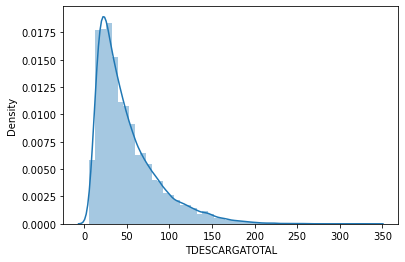

In [ ]:
# OBSERVAMOS EL COMPORTAMIENTO DE LA VARIABLE TARGET (TIEMPO DE DESCARGA QUE ES LA VARIABLE A PREDECIR POR EL MODELO)
sns.distplot(df1['TDESCARGATOTAL'])

<AxesSubplot:xlabel='TDESCARGATOTAL'>

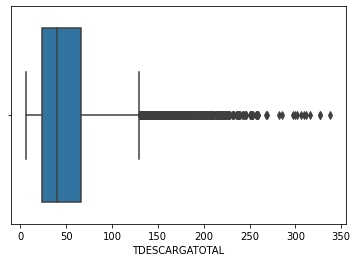

In [ ]:
# Realizamos boxplots para determinar la presencia de outliers en la variable target
sns.boxplot(x=df1['TDESCARGATOTAL'])

In [ ]:
# Realizamos un analisis preliminar de correlaciones de la nueva data para explorar insights 
# tomando en cuenta la variable target (TDESGARGATOTAL) y las posibles variables independientes 
df1.corr()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,DOC_TRANS,V_ENTREGADO,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T5PROD,DISTANCIA
TKNUM,1.000000,0.030341,0.203119,0.498304,0.052654,-0.075754,0.990904,0.996247,1.000000,-0.067038,-0.092891,0.098104,0.498304,0.099684,-0.080578,-0.027474,-0.008274,-0.005650,-0.161781,0.079505,-0.022898,-0.003423,0.143839,0.038256,0.088388
WERKS,0.030341,1.000000,-0.019390,-0.057968,0.067575,-0.031444,0.035195,0.035204,0.030341,-0.003602,0.017103,0.460078,-0.057968,0.454937,0.013786,-0.019070,-0.017295,-0.004990,0.018856,-0.072230,-0.040668,-0.005860,-0.086290,-0.087008,-0.037939
KUNNR,0.203119,-0.019390,1.000000,0.126362,-0.036558,-0.074669,0.200499,0.202870,0.203119,-0.005934,0.075652,-0.076825,0.126362,-0.063130,0.084119,0.014924,0.009700,-0.003703,-0.021183,0.043775,-0.046607,-0.027382,0.047226,-0.007150,0.083433
IDEOBRA,0.498304,-0.057968,0.126362,1.000000,-0.049150,0.121482,0.494277,0.494275,0.498304,0.090735,-0.239827,0.203347,1.000000,0.199118,-0.229809,-0.010071,0.004462,-0.009736,-0.082532,0.099927,-0.017503,-0.166307,0.178508,0.020456,0.047319
ID_ESTRUC,0.052654,0.067575,-0.036558,-0.049150,1.000000,-0.116378,0.048202,0.046547,0.052654,-0.041470,0.174509,-0.136291,-0.049150,-0.137687,0.183638,0.000662,-0.016871,-0.005938,0.008846,0.029797,-0.024320,0.187360,0.006046,0.110430,0.054741
ID_MODALIDAD,-0.075754,-0.031444,-0.074669,0.121482,-0.116378,1.000000,-0.071455,-0.073250,-0.075754,0.032606,-0.169598,0.131943,0.121482,0.125916,-0.169906,0.008653,0.014624,0.008342,0.010387,-0.018418,0.007280,-0.083319,-0.003171,-0.031547,-0.045981
VBELN_PED,0.990904,0.035195,0.200499,0.494277,0.048202,-0.071455,1.000000,0.994369,0.990904,-0.069592,-0.095572,0.102985,0.494277,0.105557,-0.083671,-0.025939,-0.008495,-0.010637,-0.170342,0.082473,-0.022058,-0.001924,0.151156,0.037722,0.086568
VBELN_ENTREGA,0.996247,0.035204,0.202870,0.494275,0.046547,-0.073250,0.994369,1.000000,0.996247,-0.070174,-0.096692,0.104043,0.494275,0.106427,-0.084795,-0.025576,-0.009657,-0.006291,-0.171369,0.082330,-0.022665,-0.003557,0.152929,0.035860,0.087572
DOC_TRANS,1.000000,0.030341,0.203119,0.498304,0.052654,-0.075754,0.990904,0.996247,1.000000,-0.067038,-0.092891,0.098104,0.498304,0.099684,-0.080578,-0.027474,-0.008274,-0.005650,-0.161781,0.079505,-0.022898,-0.003423,0.143839,0.038256,0.088388
V_ENTREGADO,-0.067038,-0.003602,-0.005934,0.090735,-0.041470,0.032606,-0.069592,-0.070174,-0.067038,1.000000,-0.055812,0.049385,0.090735,0.048911,-0.056649,0.023327,0.019929,0.005160,0.041315,0.045040,-0.042518,-0.136538,0.030020,-0.040047,0.013503


Text(0.5, 1.0, 'Correlacion Variables ')

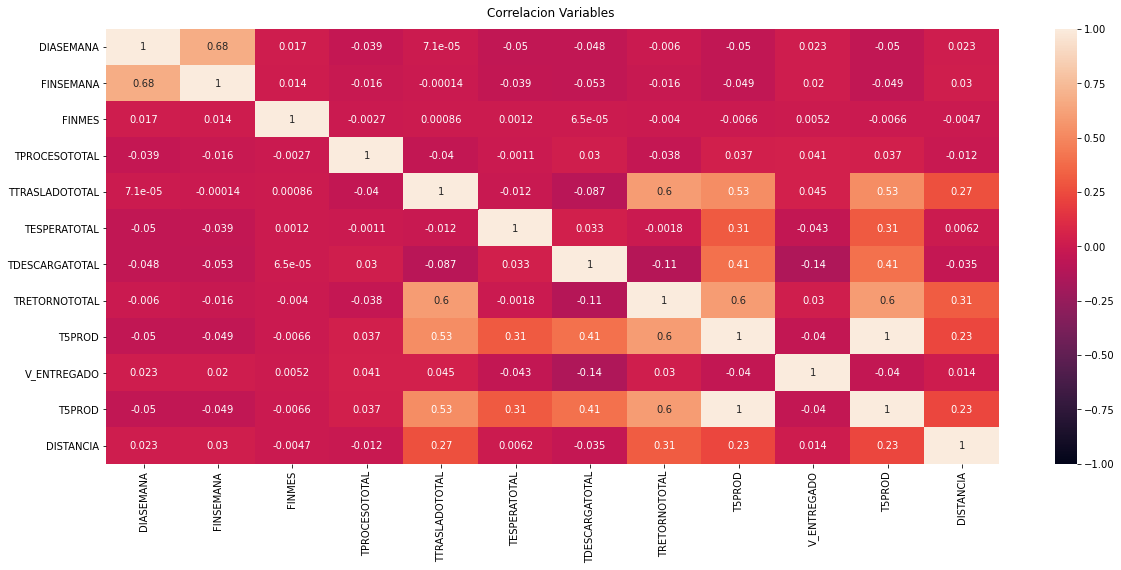

In [ ]:
# HACEMOS HEATMAPS DE CORRELACIÓN SEPARADOS PARA VER LA CORRELACION ENTRE VARIABLES INDEPENDIENTES EN EL TARGET TDESCARGATOTAL
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap1 = sns.heatmap(df1[['DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 
                           'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T5PROD','V_ENTREGADO','T5PROD','DISTANCIA']].corr(), vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Correlacion Variables ', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Tipos de Estructura')

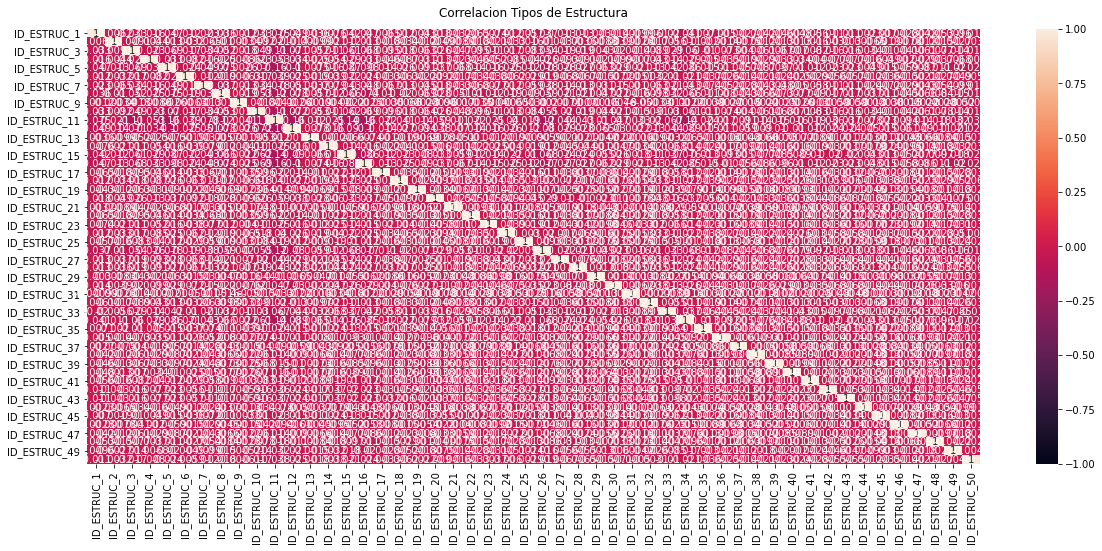

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap2 = sns.heatmap(df2[['ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 
               'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13',
               'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 'ID_ESTRUC_20', 
               'ID_ESTRUC_21', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTRUC_26', 'ID_ESTRUC_27',
               'ID_ESTRUC_28', 'ID_ESTRUC_29', 'ID_ESTRUC_30', 'ID_ESTRUC_31', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34',
               'ID_ESTRUC_35', 'ID_ESTRUC_36', 'ID_ESTRUC_37', 'ID_ESTRUC_38', 'ID_ESTRUC_39', 'ID_ESTRUC_40', 'ID_ESTRUC_41',
               'ID_ESTRUC_42', 'ID_ESTRUC_43', 'ID_ESTRUC_44', 'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_47', 'ID_ESTRUC_48',
               'ID_ESTRUC_49', 'ID_ESTRUC_50']].corr(), vmin=-1, vmax=1, annot=True)
heatmap2.set_title('Correlacion Tipos de Estructura', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Centros de Distribución WERKS)')

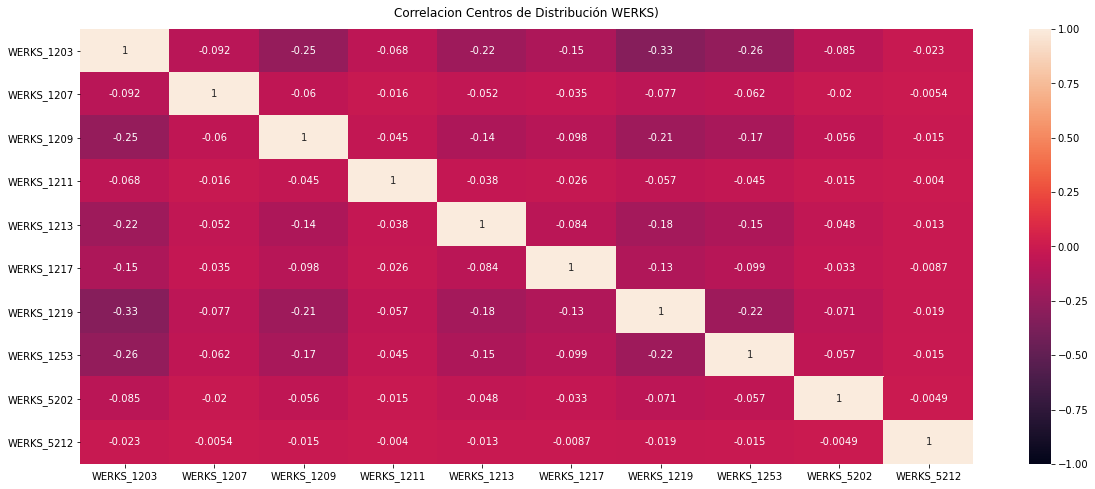

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap4 = sns.heatmap(df2[['WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211', 'WERKS_1213', 
               'WERKS_1217', 'WERKS_1219', 'WERKS_1253', 'WERKS_5202', 'WERKS_5212']].corr(), vmin=-1, vmax=1, annot=True)
heatmap4.set_title('Correlacion Centros de Distribución WERKS)', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Modalidad de despacho)')

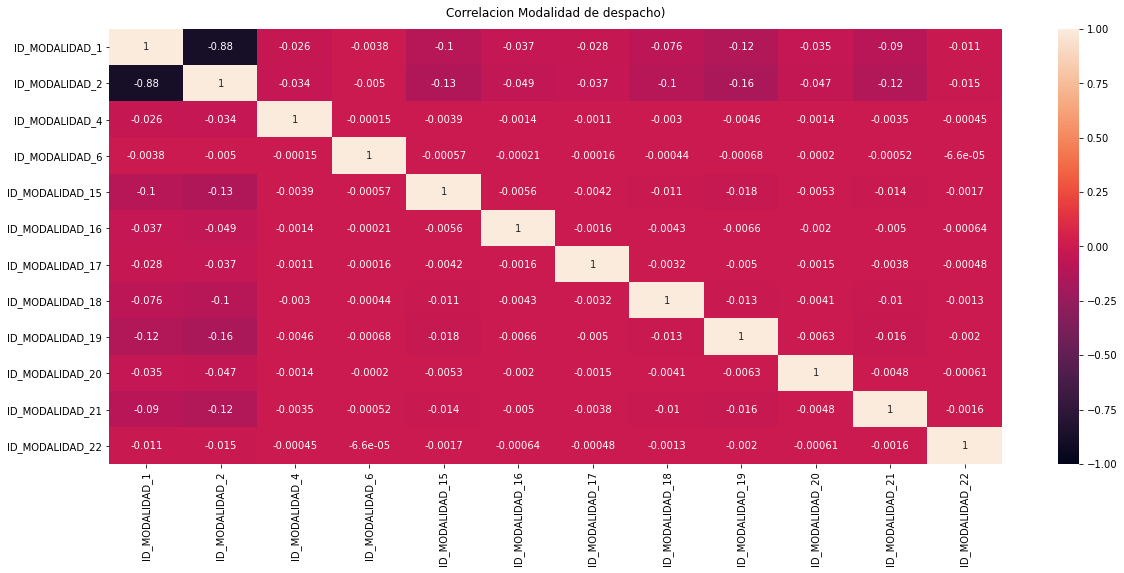

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap5 = sns.heatmap(df2[['ID_MODALIDAD_1', 'ID_MODALIDAD_2', 'ID_MODALIDAD_4', 'ID_MODALIDAD_6', 'ID_MODALIDAD_15', 'ID_MODALIDAD_16', 'ID_MODALIDAD_17',
               'ID_MODALIDAD_18', 'ID_MODALIDAD_19', 'ID_MODALIDAD_20', 'ID_MODALIDAD_21', 'ID_MODALIDAD_22']].corr(), vmin=-1, vmax=1, annot=True)
heatmap5.set_title('Correlacion Modalidad de despacho)', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Tiempo de Asentamiento)')

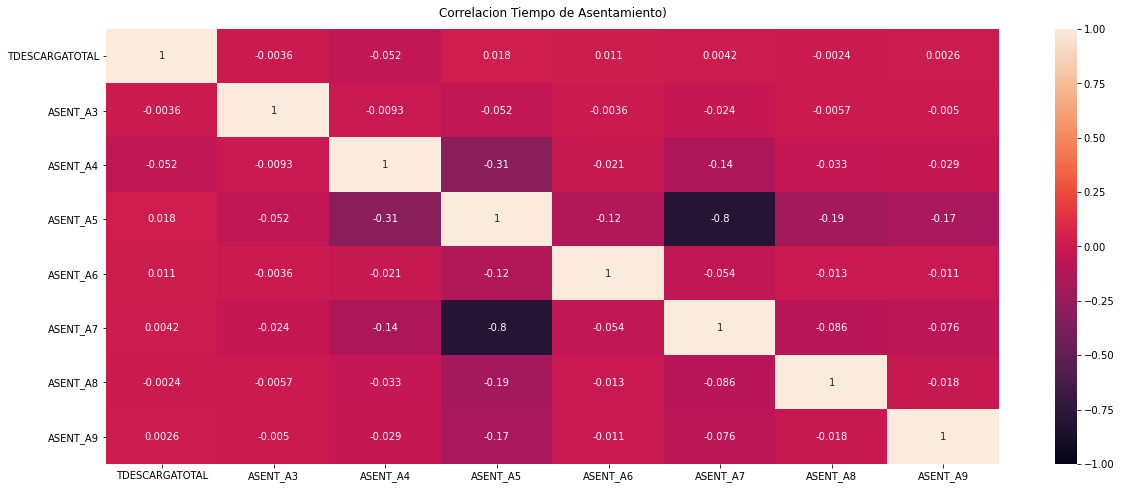

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap6 = sns.heatmap(df2[['TDESCARGATOTAL','ASENT_A3', 'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 
                 'ASENT_A7', 'ASENT_A8', 'ASENT_A9']].corr(), vmin=-1, vmax=1, annot=True)
heatmap6.set_title('Correlacion Tiempo de Asentamiento)', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Tiempo de Asentamiento Agrupado)')

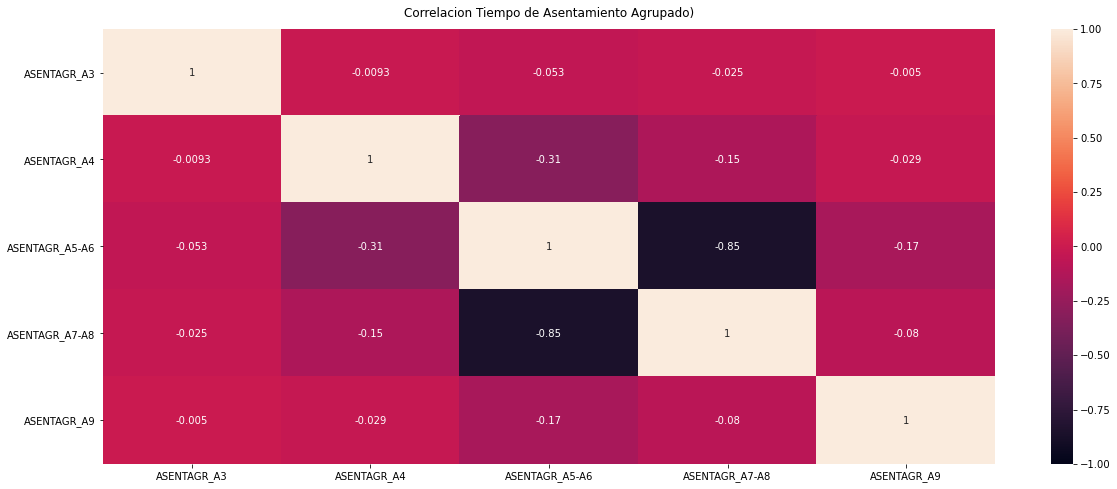

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap7 = sns.heatmap(df2[['ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6',
               'ASENTAGR_A7-A8', 'ASENTAGR_A9']].corr(), vmin=-1, vmax=1, annot=True)
heatmap7.set_title('Correlacion Tiempo de Asentamiento Agrupado)', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlacion Tamaño de Obra Clusterizado)')

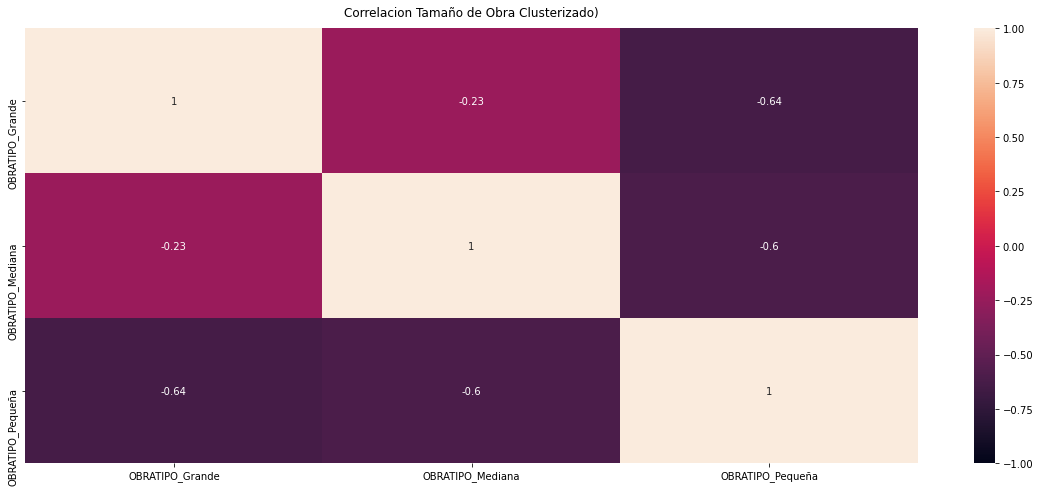

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
heatmap8 = sns.heatmap(df2[['OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña']].corr(), vmin=-1, vmax=1, annot=True)
heatmap8.set_title('Correlacion Tamaño de Obra Clusterizado)', fontdict={'fontsize':12}, pad=12)

for_hist = df1[['TDESCARGATOTAL','V_ENTREGADO','DIASEMANA', 'FINSEMANA', 'FINMES','T5PROD','DISTANCIA']]
sns.pairplot(for_hist)

<AxesSubplot:xlabel='V_ENTREGADO'>

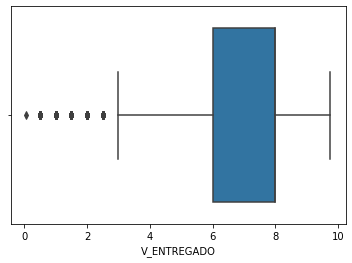

In [ ]:
sns.boxplot(x=df1['V_ENTREGADO'])

<AxesSubplot:xlabel='T5PROD'>

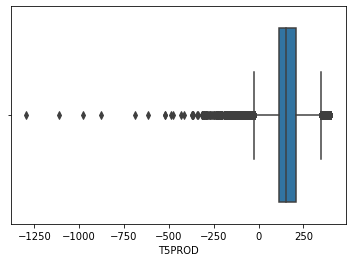

In [ ]:
sns.boxplot(x=df1['T5PROD'])


<AxesSubplot:xlabel='ID_MODALIDAD'>

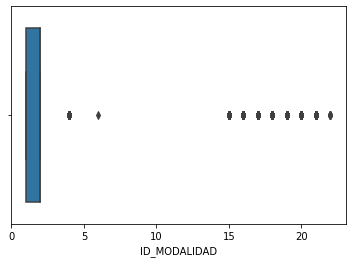

In [ ]:
sns.boxplot(x=df1['ID_MODALIDAD'])

<AxesSubplot:xlabel='DIASEMANA'>

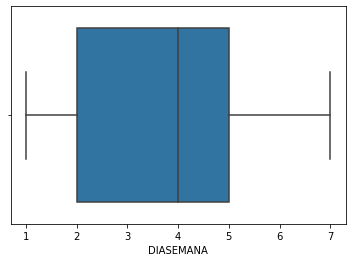

In [ ]:
sns.boxplot(x=df1['DIASEMANA'])

<AxesSubplot:xlabel='FINSEMANA'>

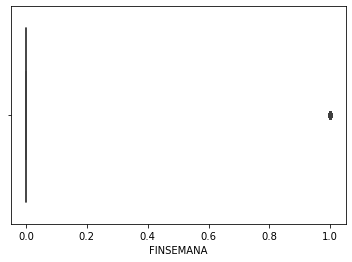

In [ ]:
sns.boxplot(x=df1['FINSEMANA'])

<AxesSubplot:xlabel='FINMES'>

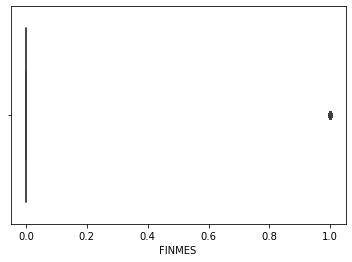

In [ ]:
sns.boxplot(x=df1['FINMES'])

<AxesSubplot:xlabel='DISTANCIA'>

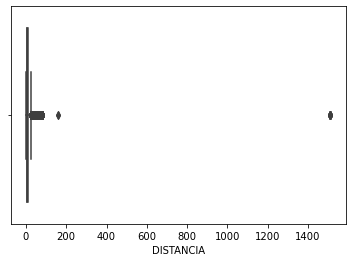

In [ ]:
sns.boxplot(x=df1['DISTANCIA'])

TRATAMIENTO DE OUTLIERS

dada la clara presencia de outliers al analizar los graficos anteriores, procedemos a buscar el mejor equilibrio
para la data cuidando eliminar la menor cantidad representativa posible

In [ ]:
 #Comprobamos el skewnewss o simetria de la data. Un rango aceptable sería entre -0.5 y 0.5 
# The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.
print(df1[['TDESCARGATOTAL','V_ENTREGADO','ID_ESTRUC','DIASEMANA', 'FINSEMANA', 'FINMES','T5PROD','DISTANCIA']].skew())
df1[['TDESCARGATOTAL','V_ENTREGADO','ID_ESTRUC','DIASEMANA', 'FINSEMANA', 'FINMES','T5PROD','DISTANCIA']].describe()

TDESCARGATOTAL     1.608306
V_ENTREGADO       -1.352810
ID_ESTRUC          1.215052
DIASEMANA         -0.010156
FINSEMANA          1.613880
FINMES             3.745975
T5PROD            -0.487164
DISTANCIA         41.284834
dtype: float64


,TDESCARGATOTAL,V_ENTREGADO,ID_ESTRUC,DIASEMANA,FINSEMANA,FINMES,T5PROD,DISTANCIA
count,45663.000000,45663.000000,45663.000000,45663.000000,45663.000000,45663.000000,45663.000000,45663.000000
mean,50.401704,6.952842,15.021286,3.635394,0.186015,0.058932,163.018067,11.675054
std,36.014688,1.486866,10.200445,1.745017,0.389123,0.235499,77.196435,29.273844
min,6.000000,0.050000,1.000000,1.000000,0.000000,0.000000,-1297.000000,0.000000
25%,24.000000,6.000000,8.000000,2.000000,0.000000,0.000000,114.000000,3.000000
50%,40.000000,8.000000,11.000000,4.000000,0.000000,0.000000,155.000000,6.000000
75%,66.000000,8.000000,16.000000,5.000000,0.000000,0.000000,207.000000,11.000000
max,338.000000,9.750000,50.000000,7.000000,1.000000,1.000000,400.000000,1510.000000


In [ ]:
# Buscamos el mejor metodo de correcion de OUtliers, contando con el conocimiento interno del negocio
# asegurandonos que los valores propuestos sean en verdad outliers y no valores anómalos. Se crea un nuevo data set
#chequeamos el skewness de nuevo

dfinal_out = df1.copy()
index = dfinal_out[(dfinal_out['TDESCARGATOTAL'] >= 200)|(dfinal_out['TDESCARGATOTAL'] <= 6)].index
dfinal_out.drop(index, inplace=True);
index = dfinal_out[(dfinal_out['V_ENTREGADO'] >= 8.5)|(dfinal_out['V_ENTREGADO'] <= 3.5)].index
dfinal_out.drop(index, inplace=True);
index = dfinal_out[(dfinal_out['DISTANCIA'] >= 200)|(dfinal_out['DISTANCIA'] <= 1)].index
dfinal_out.drop(index, inplace=True);
index = dfinal_out[(dfinal_out['T5PROD'] >= 400)|(dfinal_out['T5PROD'] <= 20)].index
dfinal_out.drop(index, inplace=True);
print(dfinal_out[['TDESCARGATOTAL', 'T5PROD','V_ENTREGADO','DISTANCIA']].skew())
dfinal_out[['TDESCARGATOTAL', 'T5PROD','V_ENTREGADO','DISTANCIA']].describe()

TDESCARGATOTAL    1.405261
T5PROD            0.734475
V_ENTREGADO      -1.130191
DISTANCIA         1.977338
dtype: float64


,TDESCARGATOTAL,T5PROD,V_ENTREGADO,DISTANCIA
count,40910.000000,40910.000000,40910.000000,40910.000000
mean,50.040724,170.049988,7.086141,12.023051
std,34.436138,68.173963,1.243683,13.278146
min,7.000000,21.000000,3.700000,2.000000
25%,25.000000,118.000000,6.000000,3.000000
50%,40.000000,159.000000,8.000000,7.000000
75%,66.000000,211.000000,8.000000,12.000000
max,199.000000,399.000000,8.250000,159.000000


In [ ]:
dfinaldummies = dfinal_out.copy()

In [ ]:
# Creamos variables dummy para cada una de las variables descriptivas que inferimos podrian incidir en el tiempo de descarga
dfinaldummies=dummy_convert(dfinaldummies,"ID_ESTRUC")
dfinaldummies=dummy_convert(dfinaldummies,"WERKS")
dfinaldummies=dummy_convert(dfinaldummies, "ID_MODALIDAD")
dfinaldummies=dummy_convert(dfinaldummies, "ASENT")
dfinaldummies=dummy_convert(dfinaldummies, "ASENTAGR")
dfinaldummies=dummy_convert(dfinaldummies, 'OBRATIPO')
#aplica la funcion para ID_Estruc


In [ ]:
dfinal_out.shape

(40910, 55)

In [ ]:
# Realizamos un analisis preliminar de correlaciones de la nueva data para explorar insights 
# tomando en cuenta la variable target (TDESGARGATOTAL) y las posiblesvariables independientes 
dfinaldummies.corr()

,TKNUM,WERKS,KUNNR,IDEOBRA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,DOC_TRANS,V_ENTREGADO,WERK_LAT,WERK_LON,OBRA_COD,OBRA_LON,OBRA_LAT,DIASEMANA,FINSEMANA,FINMES,TPROCESOTOTAL,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T5PROD,DISTANCIA,ID_ESTRUC_1,ID_ESTRUC_2,ID_ESTRUC_3,ID_ESTRUC_4,ID_ESTRUC_5,ID_ESTRUC_6,ID_ESTRUC_7,ID_ESTRUC_8,ID_ESTRUC_9,ID_ESTRUC_10,ID_ESTRUC_11,ID_ESTRUC_12,ID_ESTRUC_13,ID_ESTRUC_14,ID_ESTRUC_15,ID_ESTRUC_16,ID_ESTRUC_17,ID_ESTRUC_18,ID_ESTRUC_19,ID_ESTRUC_20,ID_ESTRUC_21,ID_ESTRUC_22,ID_ESTRUC_23,ID_ESTRUC_24,ID_ESTRUC_25,ID_ESTRUC_26,ID_ESTRUC_27,ID_ESTRUC_28,ID_ESTRUC_29,ID_ESTRUC_30,ID_ESTRUC_31,ID_ESTRUC_32,ID_ESTRUC_33,ID_ESTRUC_34,ID_ESTRUC_35,ID_ESTRUC_36,ID_ESTRUC_37,ID_ESTRUC_38,ID_ESTRUC_39,ID_ESTRUC_40,ID_ESTRUC_41,ID_ESTRUC_42,ID_ESTRUC_43,ID_ESTRUC_44,ID_ESTRUC_45,ID_ESTRUC_46,ID_ESTRUC_47,ID_ESTRUC_48,ID_ESTRUC_49,ID_ESTRUC_50,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_1253,WERKS_5202,WERKS_5212,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_4,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21,ID_MODALIDAD_22,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña
TKNUM,1.000000,0.033078,0.217919,0.498086,0.043158,-0.079565,0.990856,0.996264,1.000000,-0.090423,-0.079992,0.086770,0.498086,0.088406,-0.072685,-0.023222,-0.004926,-0.003961,-0.161731,0.075832,-0.036207,-0.010777,0.139854,-0.021864,0.142719,-0.032049,-0.058422,0.017021,0.000136,-0.071385,0.012363,-0.077516,0.012231,-0.008268,-0.064194,0.029970,0.006839,-0.001088,0.007064,0.067937,0.021177,-0.044028,-0.025294,-0.021556,0.045656,0.003369,0.015737,0.006199,-0.000025,-0.045997,0.109410,0.002687,-0.020388,-0.020658,-0.023113,-0.005181,-0.016838,-0.025242,-0.085487,0.025208,-0.021990,-0.022103,-0.018381,0.023653,-0.002540,-0.022542,0.020810,0.021313,-0.009223,-0.006492,0.011703,-0.017171,-0.006395,0.046684,0.078753,0.009248,-0.039006,0.058886,0.134019,0.055705,-0.069755,0.032899,-0.156092,0.041387,-0.013733,0.107962,-0.068290,-0.010268,-0.104358,-0.017674,-0.042777,-0.020750,0.032160,-0.024212,-0.048125,0.024246,-0.057604,-0.367618,-0.633984,0.054449,0.712965,0.253356,0.229729,-0.057604,-0.367618,-0.626729,0.776354,0.229729,-0.222421,0.056777,0.132712
WERKS,0.033078,1.000000,-0.013170,-0.058139,0.076048,-0.030808,0.037832,0.037722,0.033078,0.003179,0.014500,0.461679,-0.058139,0.455999,0.011581,-0.012173,-0.015099,-0.004461,0.021232,-0.077233,-0.040188,-0.007225,-0.091963,-0.097323,-0.083730,0.010013,-0.006481,0.043357,-0.012016,-0.046397,-0.011533,-0.017784,-0.032243,-0.001163,-0.029326,-0.033195,0.031304,-0.003833,-0.008235,0.055200,-0.007006,-0.007435,-0.010572,-0.004263,-0.017595,0.079195,-0.005296,0.000133,-0.008655,-0.005490,-0.001952,-0.014244,-0.004125,-0.003460,-0.008778,-0.000949,0.188587,-0.018081,-0.022297,-0.007702,-0.005217,-0.003158,-0.004463,0.038986,0.003161,-0.002533,-0.011117,-0.006361,-0.002180,-0.004480,-0.002978,-0.004476,-0.005531,-0.009292,0.284022,-0.107035,-0.023708,-0.060618,-0.017076,-0.050286,-0.033007,-0.071991,-0.029521,0.972743,0.225878,-0.038467,0.055758,-0.004405,-0.017921,-0.006633,-0.004896,-0.013443,-0.020801,-0.006827,-0.015599,-0.002176,-0.004899,-0.031384,0.030345,-0.005463,-0.023486,0.016604,0.007603,-0.004899,-0.031384,0.029453,-0.017829,0.007603,0.155111,-0.062663,-0.073909
KUNNR,0.217919,-0.013170,1.000000,0.127146,-0.022627,-0.078608,0.213206,0.215801,0.217919,-0.030497,0.086160,-0.082126,0.127146,-0.066740,0.090743,0.013699,0.010893,-0.005036,-0.021456,0.062249,-0.050535,-0.022792,0.062966,0.004492,0.136996,0.006841,-0.013333,0.021354,0.035070,0.062221,-0.033649,-0.022413,-0.090815,-0.004645,-0.051536,0.018051,0.161353,-0.012095,-0.009849,-0.033323,-0.089512,-0.022380,-0.025864,-0.016551,-0.048262,-0.010782,0.004825,0.002838,-0.009834,-0.016001,-0.003347,

<AxesSubplot:>

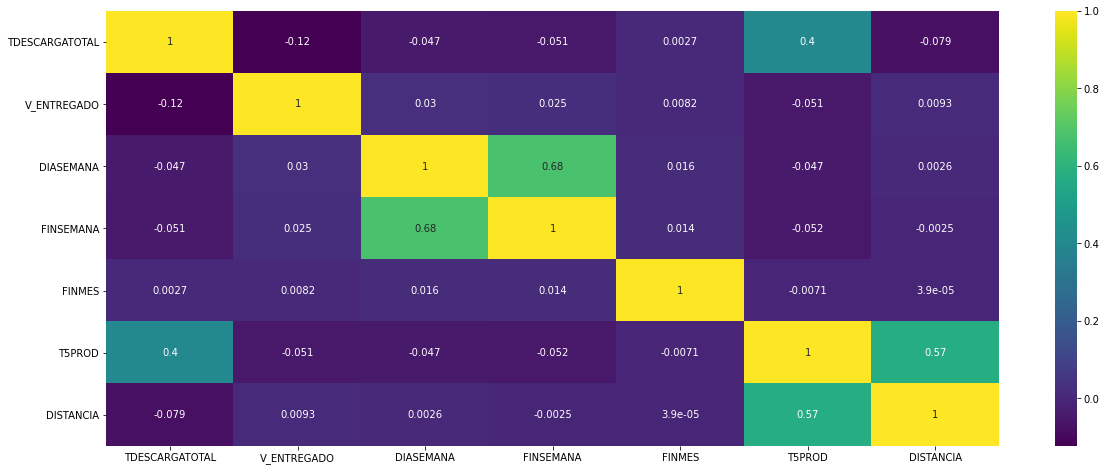

In [ ]:
# HACEMOS HEATMAPS DE CORRELACIÓN SEPARADOS PARA VER LA INCIDENCIA DE LAS VARIABLES INDEPENDIENTES EN EL TARGET TDESCARGATOTAL
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(dfinaldummies[['TDESCARGATOTAL','V_ENTREGADO','DIASEMANA', 'FINSEMANA', 'FINMES','T5PROD','DISTANCIA']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

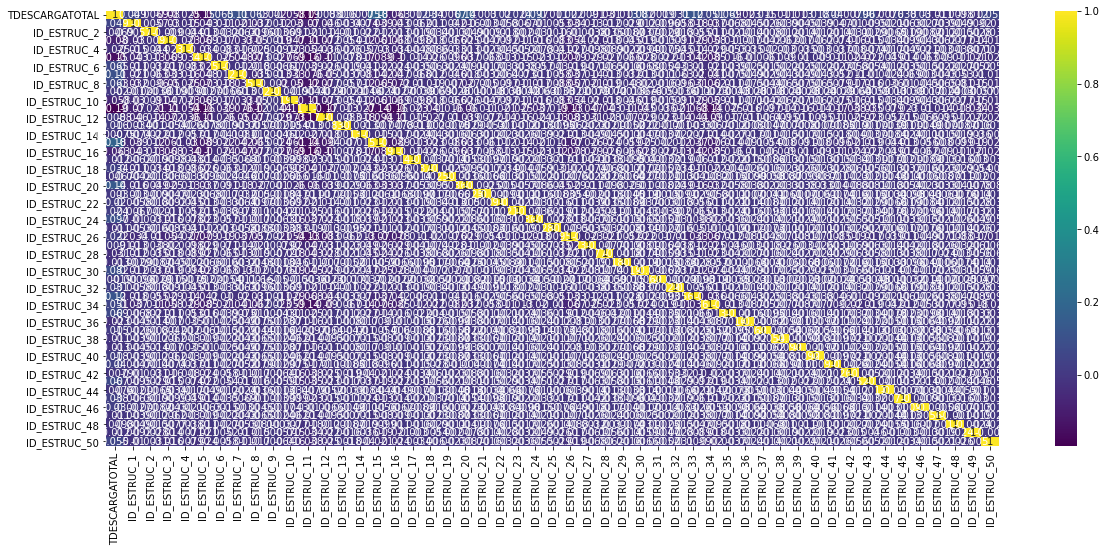

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(dfinaldummies[['TDESCARGATOTAL','ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 
               'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13',
               'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 'ID_ESTRUC_20', 
               'ID_ESTRUC_21', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 'ID_ESTRUC_25', 'ID_ESTRUC_26', 'ID_ESTRUC_27',
               'ID_ESTRUC_28', 'ID_ESTRUC_29', 'ID_ESTRUC_30', 'ID_ESTRUC_31', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34',
               'ID_ESTRUC_35', 'ID_ESTRUC_36', 'ID_ESTRUC_37', 'ID_ESTRUC_38', 'ID_ESTRUC_39', 'ID_ESTRUC_40', 'ID_ESTRUC_41',
               'ID_ESTRUC_42', 'ID_ESTRUC_43', 'ID_ESTRUC_44', 'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_47', 'ID_ESTRUC_48',
               'ID_ESTRUC_49', 'ID_ESTRUC_50']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

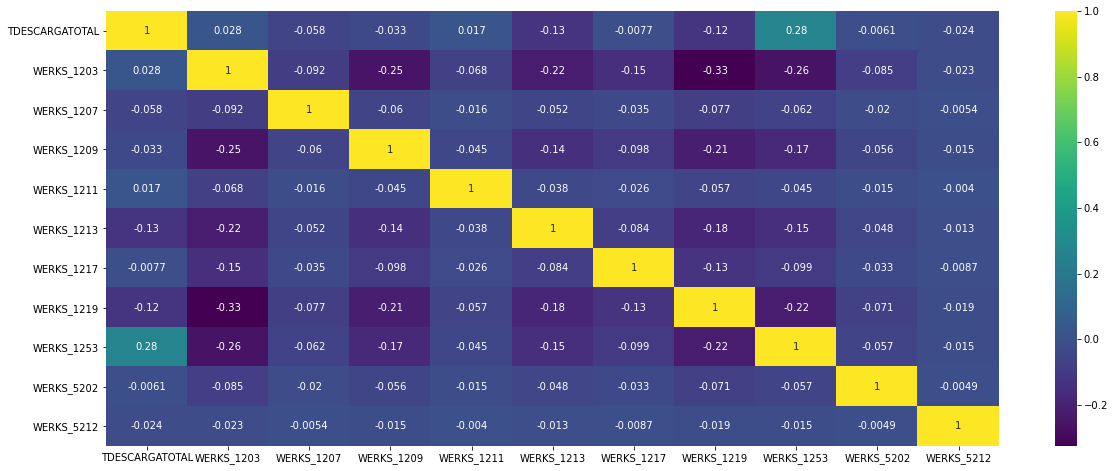

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df2[['TDESCARGATOTAL','WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211', 'WERKS_1213', 
               'WERKS_1217', 'WERKS_1219', 'WERKS_1253', 'WERKS_5202', 'WERKS_5212']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

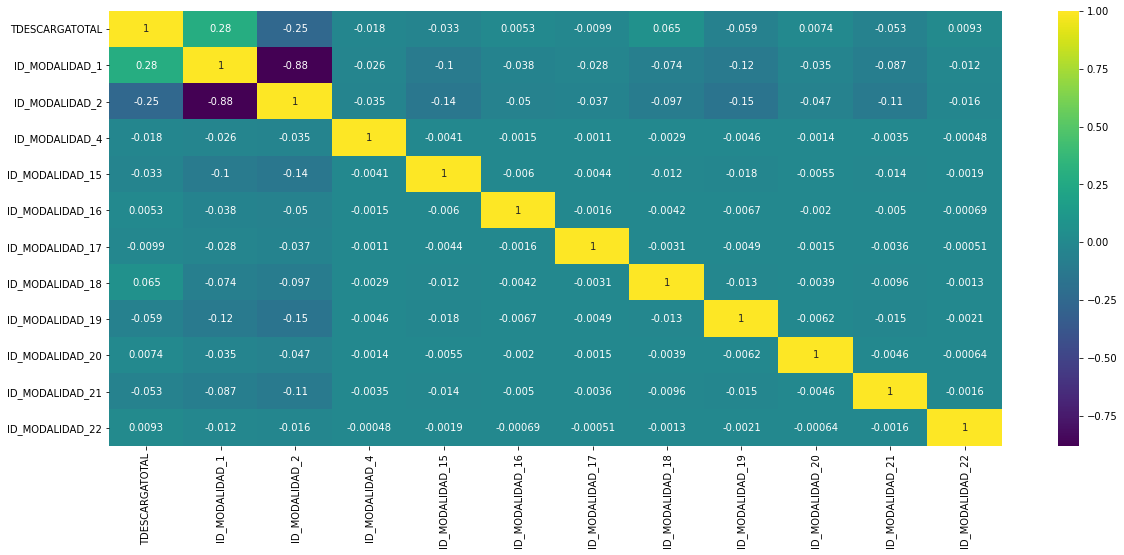

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(dfinaldummies[['TDESCARGATOTAL','ID_MODALIDAD_1', 'ID_MODALIDAD_2', 'ID_MODALIDAD_4',  'ID_MODALIDAD_15', 'ID_MODALIDAD_16', 'ID_MODALIDAD_17',
               'ID_MODALIDAD_18', 'ID_MODALIDAD_19', 'ID_MODALIDAD_20', 'ID_MODALIDAD_21', 'ID_MODALIDAD_22']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

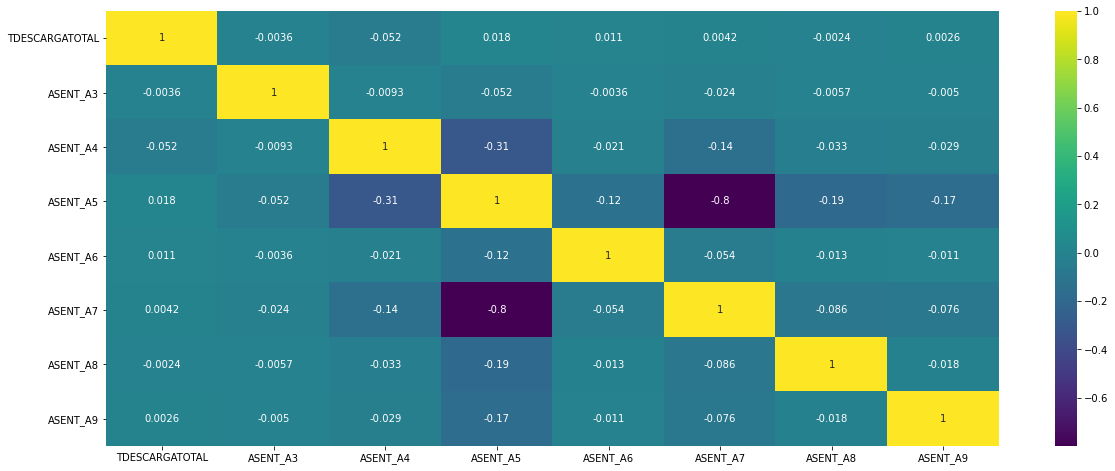

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df2[['TDESCARGATOTAL','ASENT_A3', 'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 
                 'ASENT_A7', 'ASENT_A8', 'ASENT_A9']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

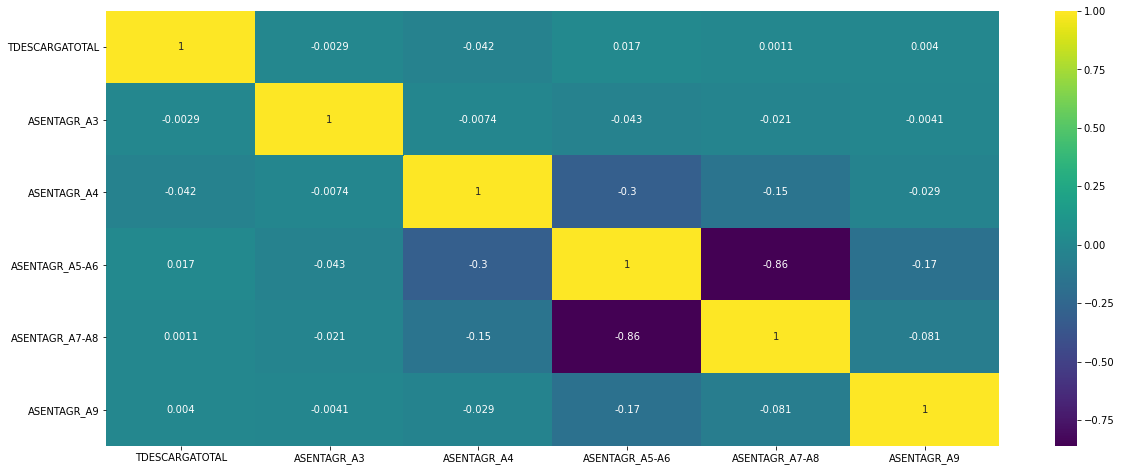

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(dfinaldummies[['TDESCARGATOTAL','ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6',
               'ASENTAGR_A7-A8', 'ASENTAGR_A9']].corr(), annot = True, cmap="viridis" )

<AxesSubplot:>

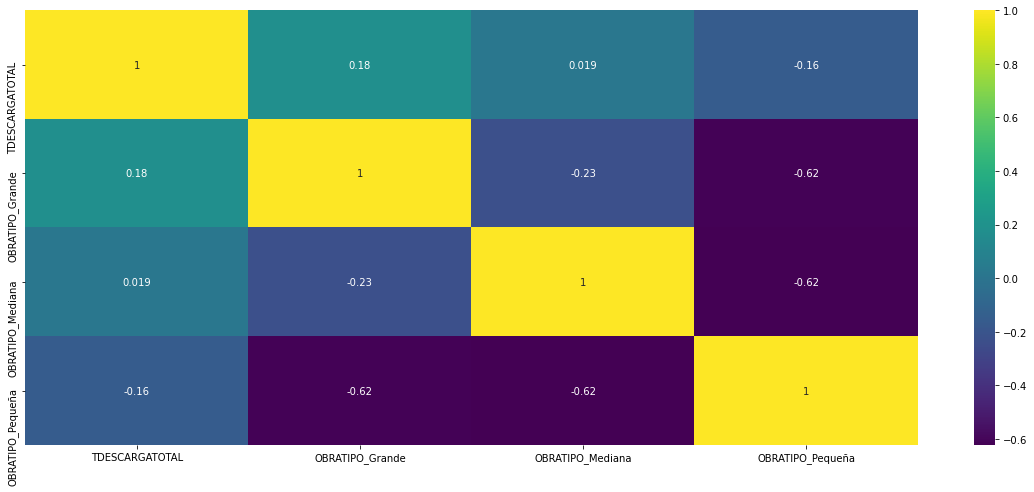

In [ ]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(dfinaldummies[['TDESCARGATOTAL','OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña']].corr(), annot = True, cmap="viridis" )

for_hist = df1[['TDESCARGATOTAL','V_ENTREGADO','DIASEMANA', 'FINSEMANA', 'FINMES','T5PROD','DISTANCIA']]
sns.pairplot(for_hist)

<AxesSubplot:xlabel='V_ENTREGADO'>

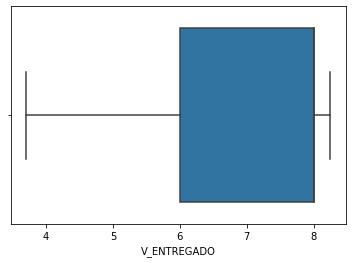

In [ ]:
sns.boxplot(x=dfinaldummies['V_ENTREGADO'])

<AxesSubplot:xlabel='T5PROD'>

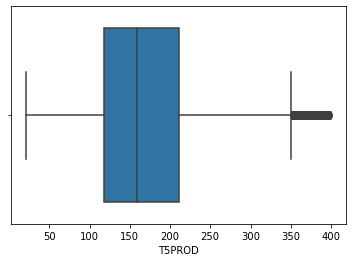

In [ ]:
sns.boxplot(x=dfinaldummies['T5PROD'])


<AxesSubplot:xlabel='ID_MODALIDAD'>

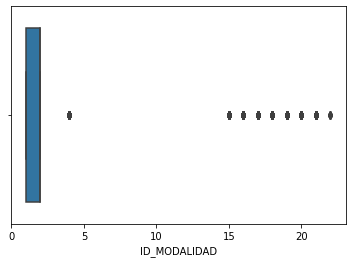

In [ ]:
sns.boxplot(x=dfinaldummies['ID_MODALIDAD'])

<AxesSubplot:xlabel='DIASEMANA'>

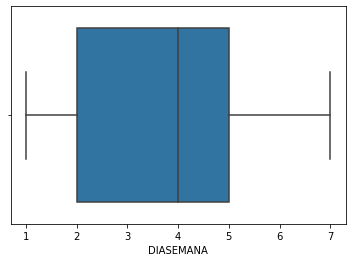

In [ ]:
sns.boxplot(x=dfinaldummies['DIASEMANA'])

<AxesSubplot:xlabel='FINSEMANA'>

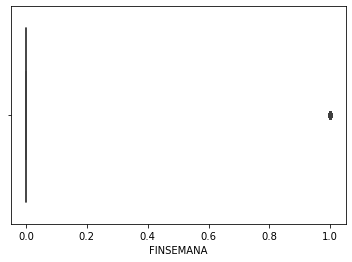

In [ ]:
sns.boxplot(x=dfinaldummies['FINSEMANA'])

<AxesSubplot:xlabel='FINMES'>

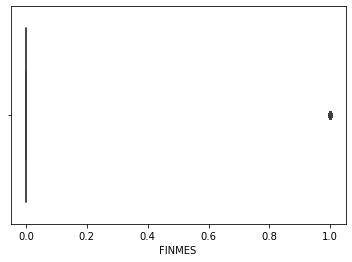

In [ ]:
sns.boxplot(x=dfinaldummies['FINMES'])

<AxesSubplot:xlabel='DISTANCIA'>

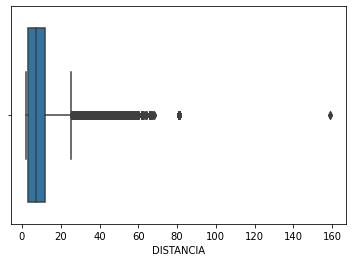

In [ ]:
sns.boxplot(x=dfinaldummies['DISTANCIA'])

<AxesSubplot:xlabel='TDESCARGATOTAL'>

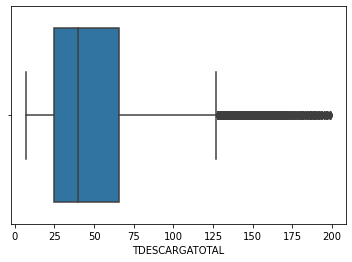

In [ ]:
sns.boxplot(x=dfinaldummies['TDESCARGATOTAL'])

# SELECCIONAMOS LAS VARIABLES QUE PODRÍAN TENER INFLUENCIA EN EL TIEMPO DE DESCARGA Y LO ANALIZAMOS GRÁFICAMENTE
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)
df3=dfdummies[['V_ENTREGADO', 'TDESCARGATOTAL', 'T5PROD', 'DIASEMANA','FINSEMANA', 'FINMES', 'ID_MODALIDAD']]
cols=df2.corr()['TDESCARGATOTAL'].sort_values(ascending=False)
fig=plt.figure(figsize=(15,10))
plt.suptitle("Comparativa de variables que influyen en el tiempo de descarga",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df2, x='TDESCARGATOTAL',y=i, color=color[-j])
    ax.legend('')
    j=j+1
    
plt.legend('')
     

In [ ]:
print(dfinaldummies.columns.tolist())

['TKNUM', 'WERKS', 'FECHA_DESP', 'KUNNR', 'IDEOBRA', 'MATNR', 'FORMULA', 'ID_ESTRUC', 'ID_MODALIDAD', 'VBELN_PED', 'VBELN_ENTREGA', 'FEC_PROD', 'DOC_TRANS', 'ESTADO', 'PLACA', 'CLIENTE', 'DESC_OBRA', 'PTO_EXPED', 'V_ENTREGADO', 'H_PROGRAM', 'TPROCESO1', 'TPROCESO2', 'Tiempo Proceso Minutos', 'TRASLADO1', 'TRASLADO 2', 'TRASLADO', 'ESPERA1', 'ESPERA2', 'TESPERA', 'DESCARGA1', 'DESCARGA2', 'TDESCARGA', 'RETORNO1', 'RETORNO2', 'TRETORNO', 'DIFTOTAL', 'WERK_LAT', 'WERK_LON', 'OBRA_COD', 'OBRA_LON', 'OBRA_LAT', 'DESCRIPCION', 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TPROCESOTOTAL', 'TTRASLADOTOTAL', 'TESPERATOTAL', 'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T5PROD', 'ASENT', 'ASENTAGR', 'OBRATIPO', 'DISTANCIA', 'ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12', 'ID_ESTRUC_13', 'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18', 'ID_ESTRUC_19', 

FEATURE SELECTION
Seleecionamos todas las columnas del dataset que funcionaran como variables independientes en nuestro modelo de regresion para determinar la importancia de las mismas y creamos un nuevo data set

In [ ]:
dfeatures = dfinaldummies[[ 'DIASEMANA', 'FINSEMANA', 'FINMES', 'TTRASLADOTOTAL', 'TESPERATOTAL', 
                           'TDESCARGATOTAL', 'TRETORNOTOTAL', 'T5PROD', 'DISTANCIA', 
                           'ID_ESTRUC_1', 'ID_ESTRUC_2', 'ID_ESTRUC_3', 'ID_ESTRUC_4', 'ID_ESTRUC_5', 'ID_ESTRUC_6', 
                           'ID_ESTRUC_7', 'ID_ESTRUC_8', 'ID_ESTRUC_9', 'ID_ESTRUC_10', 'ID_ESTRUC_11', 'ID_ESTRUC_12',
                           'ID_ESTRUC_13', 'ID_ESTRUC_14', 'ID_ESTRUC_15', 'ID_ESTRUC_16', 'ID_ESTRUC_17', 'ID_ESTRUC_18',
                           'ID_ESTRUC_19', 'ID_ESTRUC_20', 'ID_ESTRUC_21', 'ID_ESTRUC_22', 'ID_ESTRUC_23', 'ID_ESTRUC_24', 
                           'ID_ESTRUC_25', 'ID_ESTRUC_26', 'ID_ESTRUC_27', 'ID_ESTRUC_28', 'ID_ESTRUC_29', 'ID_ESTRUC_30', 
                           'ID_ESTRUC_31', 'ID_ESTRUC_32', 'ID_ESTRUC_33', 'ID_ESTRUC_34', 'ID_ESTRUC_35', 'ID_ESTRUC_36', 
                           'ID_ESTRUC_37', 'ID_ESTRUC_38', 'ID_ESTRUC_39', 'ID_ESTRUC_40', 'ID_ESTRUC_41', 'ID_ESTRUC_42', 
                           'ID_ESTRUC_43', 'ID_ESTRUC_44', 'ID_ESTRUC_45', 'ID_ESTRUC_46', 'ID_ESTRUC_47', 'ID_ESTRUC_48',
                           'ID_ESTRUC_49', 'ID_ESTRUC_50', 'WERKS_1203', 'WERKS_1207', 'WERKS_1209', 'WERKS_1211',
                           'WERKS_1213', 'WERKS_1217', 'WERKS_1219', 'WERKS_1253', 'WERKS_5202', 'WERKS_5212', 
                           'ID_MODALIDAD_1', 'ID_MODALIDAD_2', 'ID_MODALIDAD_4', 'ID_MODALIDAD_15', 'ID_MODALIDAD_16', 
                           'ID_MODALIDAD_17', 'ID_MODALIDAD_18', 'ID_MODALIDAD_19', 'ID_MODALIDAD_20', 'ID_MODALIDAD_21',
                           'ID_MODALIDAD_22', 'ASENT_A3', 'ASENT_A4', 'ASENT_A5', 'ASENT_A6', 'ASENT_A7', 'ASENT_A8', 
                           'ASENT_A9', 'ASENTAGR_A3', 'ASENTAGR_A4', 'ASENTAGR_A5-A6', 'ASENTAGR_A7-A8', 'ASENTAGR_A9', 
                           'OBRATIPO_Grande', 'OBRATIPO_Mediana', 'OBRATIPO_Pequeña' ]].copy()

In [ ]:
dfeatures.head(100)

,DIASEMANA,FINSEMANA,FINMES,TTRASLADOTOTAL,TESPERATOTAL,TDESCARGATOTAL,TRETORNOTOTAL,T5PROD,DISTANCIA,ID_ESTRUC_1,ID_ESTRUC_2,ID_ESTRUC_3,ID_ESTRUC_4,ID_ESTRUC_5,ID_ESTRUC_6,ID_ESTRUC_7,ID_ESTRUC_8,ID_ESTRUC_9,ID_ESTRUC_10,ID_ESTRUC_11,ID_ESTRUC_12,ID_ESTRUC_13,ID_ESTRUC_14,ID_ESTRUC_15,ID_ESTRUC_16,ID_ESTRUC_17,ID_ESTRUC_18,ID_ESTRUC_19,ID_ESTRUC_20,ID_ESTRUC_21,ID_ESTRUC_22,ID_ESTRUC_23,ID_ESTRUC_24,ID_ESTRUC_25,ID_ESTRUC_26,ID_ESTRUC_27,ID_ESTRUC_28,ID_ESTRUC_29,ID_ESTRUC_30,ID_ESTRUC_31,ID_ESTRUC_32,ID_ESTRUC_33,ID_ESTRUC_34,ID_ESTRUC_35,ID_ESTRUC_36,ID_ESTRUC_37,ID_ESTRUC_38,ID_ESTRUC_39,ID_ESTRUC_40,ID_ESTRUC_41,ID_ESTRUC_42,ID_ESTRUC_43,ID_ESTRUC_44,ID_ESTRUC_45,ID_ESTRUC_46,ID_ESTRUC_47,ID_ESTRUC_48,ID_ESTRUC_49,ID_ESTRUC_50,WERKS_1203,WERKS_1207,WERKS_1209,WERKS_1211,WERKS_1213,WERKS_1217,WERKS_1219,WERKS_1253,WERKS_5202,WERKS_5212,ID_MODALIDAD_1,ID_MODALIDAD_2,ID_MODALIDAD_4,ID_MODALIDAD_15,ID_MODALIDAD_16,ID_MODALIDAD_17,ID_MODALIDAD_18,ID_MODALIDAD_19,ID_MODALIDAD_20,ID_MODALIDAD_21,ID_MODALIDAD_22,ASENT_A3,ASENT_A4,ASENT_A5,ASENT_A6,ASENT_A7,ASENT_A8,ASENT_A9,ASENTAGR_A3,ASENTAGR_A4,ASENTAGR_A5-A6,ASENTAGR_A7-A8,ASENTAGR_A9,OBRATIPO_Grande,OBRATIPO_Mediana,OBRATIPO_Pequeña
21,3,0,0,34.0,NaN,87,36.0,240,10.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
22,3,0,0,9.0,9.0,40,22.0,168,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
23,3,0,0,22.0,8.0,19,61.0,192,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
24,3,0,0,18.0,20.0,49,19.0,190,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
25,3,0,0,18.0,12.0,45,18.0,176,6.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
26,3,0,0,13.0,3.0,69,12.0,185,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
27,3,0,0,9.0,7.0,127,12.0,245,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
28,3,0,0,31.0,31.0,13,47.0,198,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
29,3,0,0,13.0,10.0,62,12.0,176,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
31,3,0,0,14.0,9.0,70,16.0,182,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Procedemos a imputar todos los valores nulos utilizando KNN para evitar sesgar los datos, según la explicación de
# https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dfeatures = pd.DataFrame(imputer.fit_transform(dfeatures),columns = dfeatures.columns)

In [ ]:
dfeatures.isna().any()

DIASEMANA           False
FINSEMANA           False
FINMES              False
TTRASLADOTOTAL      False
TESPERATOTAL        False
TDESCARGATOTAL      False
TRETORNOTOTAL       False
T5PROD              False
DISTANCIA           False
ID_ESTRUC_1         False
ID_ESTRUC_2         False
ID_ESTRUC_3         False
ID_ESTRUC_4         False
ID_ESTRUC_5         False
ID_ESTRUC_6         False
ID_ESTRUC_7         False
ID_ESTRUC_8         False
ID_ESTRUC_9         False
ID_ESTRUC_10        False
ID_ESTRUC_11        False
ID_ESTRUC_12        False
ID_ESTRUC_13        False
ID_ESTRUC_14        False
ID_ESTRUC_15        False
ID_ESTRUC_16        False
ID_ESTRUC_17        False
ID_ESTRUC_18        False
ID_ESTRUC_19        False
ID_ESTRUC_20        False
ID_ESTRUC_21        False
ID_ESTRUC_22        False
ID_ESTRUC_23        False
ID_ESTRUC_24        False
ID_ESTRUC_25        False
ID_ESTRUC_26        False
ID_ESTRUC_27        False
ID_ESTRUC_28        False
ID_ESTRUC_29        False
ID_ESTRUC_30

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt



In [ ]:
X = pd.DataFrame(dfeatures, columns=dfeatures.columns)
y = dfeatures
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=12)
dfeatures
rf = RandomForestRegressor(max_depth=300, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.fit(X_train, y_train)

MemoryError: could not allocate 49807360 bytes

In [ ]:
plt.rcParams.update({'figure.figsize': (24.0, 16.0)})
plt.rcParams.update({'font.size': 12})
plt.barh(dfeatures.columns, rf.feature_importances_)


sns.distplot(dfclean['TTOTAL'])

f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='TDESCARGATOTAL', y='dºistancia', hue='IDEOBRA', data=dfclean, ax=ax, )

ax = sns.swarmplot(x="DIASEMANA", y="TDESCARGATOTAL", data=dfclean)

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y='TDESCARGATOTAL', x='distancia', data=dfclean, orient="h", ax=ax)

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

raw_df = dfclean
data = raw_df.groupby('distancia')['TDESCARGATOTAL'].sum().reset_index()

data['TDESCARGATOTAL'].plot(kind='hist')

dfclean['TDESCARGATOTAL'].describe()
pd.qcut(dfclean['TDESCARGATOTAL'], q=30)


#Grafa para checar la linealidade entre las variables (distancia No Importa)
plt.scatter(dfclean['distancia'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Distancia', fontsize=14)
plt.xlabel('Distancia', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()

g =sns.scatterplot(x="distancia", y="TDESCARGATOTAL",
              hue="TTOTAL",
              data=dfclean);
g.set(xscale="log");

#Checando la linealidade entre 
plt.scatter(dfclean['FINSEMANA'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Fin Semana', fontsize=14)
plt.xlabel('FinSemana', fontsize=14)
plt.ylabel('TiempoDescarga', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(dfclean['WERKS'], dfclean['TDESCARGATOTAL'], color='red')
plt.title('Tiempo Descarga Vs Plantas', fontsize=14)
plt.xlabel('Plantas', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Empezamos el Modelo
#1) Importar todas las libraria
#2) grafas de la linealidade entres las variables independentes y la variable dependent
#3) Criar analises de regression multipla para todas las variables  (Ire parar aqui)
#4) con data set maior tener un modelo de entrenamento
#5)Analisas resultadoss

sorted(DFWERKS1213)

Q1=DFWERKS1213.quantile(0.25)
Q3=DFWERKS1213.quantile(0.75)
IQR=Q3-Q1
print(IQR)

In [ ]:
# Procedemos a imputar todos los valores nulos utilizando KNN para evitar sesgar los datos, según la explicación de
# https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dfclean = pd.DataFrame(imputer.fit_transform(dfclean),columns = dfclean.columns)

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
data = dfclean.values
ix = [i for i in range(data.shape[1]) if i != 93]
X, y = data[:, ix], data[:, 93]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

dfclean.isna().any()

((DFWERKS1213 < (Q1 - 1.5 * IQR)) | (DFWERKS1213 > (Q3 + 1.5 * IQR))).sum()

print(DFWERKS1203 < (Q1 - 1.5 * IQR)) |(DFWERKS1203 > (Q3 + 1.5 * IQR))

dfinal_out_cleared_iqr = dfinal_out[~((dfinal_out < (Q1 - 1.5 * IQR)) |(dfinal_out> (Q3 + 1.5 * IQR))).any(axis=1)]
dfinal_out_cleared_iqr